# Machine Learning Project

## Import Libraries

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.neighbors import LocalOutlierFactor 
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import DBSCAN
import matplotlib
import seaborn as sb
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import normalize
from sklearn.neighbors import LocalOutlierFactor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from statistics import mode,mean,median
from scipy import stats
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
import numpy as np
import pandas as pd
import sklearn.model_selection
from sklearn.decomposition import PCA
import statistics
from scipy.io import arff
import decimal
import math
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

## Import Data

In [21]:
data = pd.read_csv("OnlineNewsPopularity/OnlineNewsPopularity.csv")

In [22]:
data.columns

Index(['url', ' timedelta', ' n_tokens_title', ' n_tokens_content',
       ' n_unique_tokens', ' n_non_stop_words', ' n_non_stop_unique_tokens',
       ' num_hrefs', ' num_self_hrefs', ' num_imgs', ' num_videos',
       ' average_token_length', ' num_keywords', ' data_channel_is_lifestyle',
       ' data_channel_is_entertainment', ' data_channel_is_bus',
       ' data_channel_is_socmed', ' data_channel_is_tech',
       ' data_channel_is_world', ' kw_min_min', ' kw_max_min', ' kw_avg_min',
       ' kw_min_max', ' kw_max_max', ' kw_avg_max', ' kw_min_avg',
       ' kw_max_avg', ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_max_shares', ' self_reference_avg_sharess',
       ' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday', ' is_weekend', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sent

In [23]:
data.drop(labels=['url',' timedelta',' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
       ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
       ' weekday_is_sunday',' avg_positive_polarity', ' kw_avg_avg',' title_subjectivity' ], axis = 1, inplace=True)

# data.drop(labels=['url',' timedelta',' weekday_is_monday', ' weekday_is_tuesday', ' weekday_is_wednesday',
#        ' weekday_is_thursday', ' weekday_is_friday', ' weekday_is_saturday',
#        ' weekday_is_sunday',' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity',' kw_avg_min', ' kw_avg_max',' kw_avg_avg',' title_subjectivity' ], axis = 1, inplace=True)

In [24]:
data  = data[data[' n_tokens_content'] != 0]

In [25]:
arr = data.to_numpy()

In [26]:
X = arr[:,:-1]

Y= arr[:,-1]

In [27]:
Y = np.reshape(Y,(-1,1))

In [28]:
Y

array([[ 593.],
       [ 711.],
       [1500.],
       ...,
       [1900.],
       [1100.],
       [1300.]])

## Data Pre-Processing

### Removing outliers using IQR

In [29]:
Y_sorted = np.sort(np.reshape(Y,(-1,)))

In [30]:
length = Y.shape[0]
min_val = Y_sorted[length//20]
max_val = Y_sorted[(19*length)//20]
print(min_val,max_val)

584.0 10700.0


In [31]:
Y_cleaned = []

for ele in Y_sorted:
    if(ele>min_val and ele<max_val):
        Y_cleaned.append(ele)

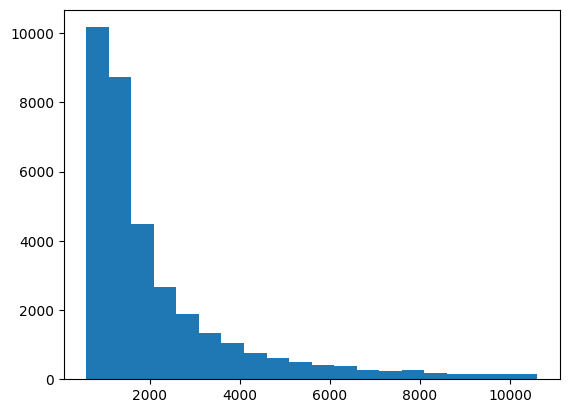

In [32]:
# plt.hist(Y,bins = 10)
plt.hist(Y_cleaned,bins=20)
plt.show()

In [33]:
# dataplot = sb.heatmap(data[[' avg_positive_polarity', ' min_positive_polarity', ' max_positive_polarity']].corr(), annot = True, cmap="YlGnBu") 

We use only average of all 3 categories as the data is highly correlated.

In [34]:
# data.drop(labels=[' kw_avg_min', ' kw_avg_max',' kw_avg_avg' ], axis = 1, inplace=True)

In [35]:
# data.drop(labels=[' title_subjectivity' ], axis = 1, inplace=True)

## Data Clustering

In [36]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:


    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, n_init="auto", random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

For n_clusters = 2 The average silhouette_score is : 0.7923022906694568
For n_clusters = 3 The average silhouette_score is : 0.4825168252279397
For n_clusters = 4 The average silhouette_score is : 0.545096937991446


KeyboardInterrupt: 

We will use k = 3 and k = 5

In [38]:
kmeans = KMeans(n_clusters=3, random_state=0, n_init="auto").fit(X)

In [39]:
X = np.hstack((X,np.reshape(kmeans.labels_,(-1,1))))

In [40]:
kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto").fit(X)

In [41]:
X = np.hstack((X,np.reshape(kmeans.labels_,(-1,1))))

## Data Classification

In [42]:
def find_class(ele,th1,th2,th3):
    if ele<=th1:
        return 1
    elif ele<=th2:
        return 2
    elif ele<=th3:
        return 3
    else:
        return 4

In [45]:
thresholds = []
for i in range(3):
    thresholds.append(Y_cleaned[((i+1)*len(Y_cleaned))//5 - 1])
classes = []
for ele in Y:
    classes.append(find_class(ele,thresholds[0],thresholds[1],thresholds[2]))
thresholds

[916.0, 1200.0, 1700.0]

In [46]:
Y = np.hstack((Y,np.reshape(classes,(-1,1))))

In [47]:
Y.shape

(38463, 2)

In [48]:
arr_modified = np.hstack((X,Y))
df = pd.DataFrame(arr_modified)

In [ ]:
df.to_csv('OnlineNewsPopularity/Data_Modified.csv')